# 課題2：住宅価格の回帰モデルの作成

本課題では課題1と同じデータを用いてデータ分析の流れを確認します。各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [2]:
# データを変数datasetに読み込む
# CSVファイルからデータを読み込む
dataset_base = pd.read_csv("iowa_ames_housing_price.csv")


In [3]:
# データの最初の5行を表示
dataset_base.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
dataset_base.columns


Index(['Order', 'area', 'price', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'P

## 3. 目的変数と説明変数の選択

ここでは、以下の列を使用します。

- 目的変数： `price`
- 説明変数： `OverallQual`, `area`, `X2ndFlrSF`, `BsmtFinSF1`,  `OverallCond`

In [5]:
# 目的変数の列名（変更しないでください）
target_col = 'price'

# 説明変数の列名（変更しないでください）
feature_cols = ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [6]:
# target_col と feature_cols を使用して dataset より目的変数と説明変数に該当する列を取得し、
# numpy 配列に変換したものを変数 Y と X に格納する

# Y:目的変数に該当する列
Y = dataset_base[target_col].values

# X:説明変数に該当する列
X = dataset_base[feature_cols].values

## 4. データの分割

この課題では、ホールドアウト法でデータを分割します。

In [7]:
# X と Y を 機械学習用データとテストデータに7:3で分ける(X_train, X_test, Y_train, Y_test)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [8]:
# 機械学習用データを、学習データと検証データに7:3で分ける(X_train, X_valid, Y_train, Y_valid)
# Trainをさらに学習データ（train）と検証データ（valid）に7:3に分ける
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

## 5. モデルの作成から評価まで

線形回帰モデルと、回帰木、ランダムフォレストの3つのモデルを作成して比較します。それぞれのモデルで以下を行います。
- モデルの作成
- 学習データによる学習
- 検証データによる予測
- MSEの算出

In [9]:
# 線形回帰モデルを作成し、学習・予測を実施して、MSEを算出する
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 線形回帰モデルの指定
linear_model = LinearRegression()

# fit()で学習を実施する
linear_model.fit(X_train, Y_train)

# predict()で予測を実施する
Y_pred = linear_model.predict(X_valid)

# MSE（平均二乗誤差）を算出
linear_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(1変数の線形回帰モデル):', linear_model_mse)

import numpy as np
rmse = np.sqrt(linear_model_mse)
rmse

print('RMSE:', np.sqrt(linear_model_mse))


MSE(1変数の線形回帰モデル): 1670916761.2011993
RMSE: 40876.84871906345


In [10]:
# 回帰木のモデルを作成し、学習・予測を実施して、MSEを算出する
# 決定木
# X4 を定義
X4 = X
from sklearn.tree import DecisionTreeRegressor

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

tree_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(回帰木):', tree_model_mse)

import numpy as np
rmse = np.sqrt(linear_model_mse)
rmse
print('RMSE(回帰木):', np.sqrt(tree_model_mse))


MSE(回帰木): 2377802173.436482
RMSE(回帰木): 48762.71294171892


In [11]:
# ランダムフォレストのモデルを作成し、学習・予測を実施して、MSEを算出する
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

randomforest_model = RandomForestRegressor(n_estimators=10, random_state=0)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

randomforest_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(ランダムフォレスト):', randomforest_model_mse)

import numpy as np
rmse = np.sqrt(linear_model_mse)
rmse
print('RMSE(ランダムフォレスト):', np.sqrt(randomforest_model_mse))

MSE(ランダムフォレスト): 1784879819.4065275
RMSE(ランダムフォレスト): 42247.838044171294


## 6. テストデータによる汎化性能の確認

3つの中でもっともMSEの値が良かったモデルについて、テストデータで汎化性能を確認しましょう。➡　 線形回帰モデル

In [ ]:
# テストデータを使って予測を行いMSEを算出


# 最も良かったモデル（線形回帰）を作成
model = LinearRegression()

# 学習（trainデータのみ）
model.fit(X_train, Y_train)

# テストデータで予測
Y_test_pred = model.predict(X_test)

# テストデータでMSE（汎化性能）
test_mse = mean_squared_error(Y_test, Y_test_pred)
print('MSE(test):', test_mse)

# RMSE（分かりやすい指標）
test_rmse = np.sqrt(test_mse)
print('RMSE(test):', test_rmse)



MSE(test): 2309649258.544849
RMSE(test): 48058.81041541549


## 7. グラフによる確認

説明変数が多い場合、「説明変数で目的変数を正しく予測できているか」を可視化することは困難です。そこで「正解と予測値」とを比較することで、予測の精度を可視化してみましょう。

### 散布図による可視化

X軸(横方向)に `テストデータの正解の値` 、Y軸(縦方向)に `予測値` を使って散布図を作成してみましょう。全体的に右肩上がりで、直線上にデータが並んでいれば、予測が行なえていると判断できます。

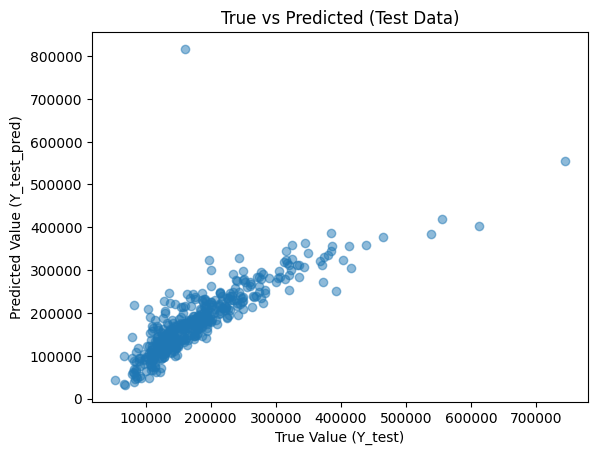

In [16]:
# X軸:正解の値、Y軸:予測値で散布図を作成
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_test_pred, alpha=0.5)
plt.xlabel('True Value (Y_test)')
plt.ylabel('Predicted Value (Y_test_pred)')
plt.title('True vs Predicted (Test Data)')
plt.show()


### ヒストグラムによる可視化

「誤差率＝正解の値と予測値との差の割合」をヒストグラムで確認してみましょう。誤差率は以下で計算できます。

`（正解の値－予測値）/ 正解の値`

併せて、誤差率の平均値、標準偏差も出力しましょう。平均値は `numpy` の `mean` 関数、標準偏差は `std` 関数で取得できます。

なお、ヒストグラムを描く際は`matplotlib.pyplot`の`hist`関数が使えます。matplotlib.pyplotはpltという名前をつけているはずなので、ヒストグラム化したいデータを`plt.hist()`の引数に渡すことでヒストグラムを描画できます。

c:\Users\Owner\Downloads\aidev\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\Downloads\aidev\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\Downloads\aidev\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35492 (\N{CJK UNIFIED IDEOGRAPH-8AA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\Downloads\aidev\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\Downloads\aidev\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{

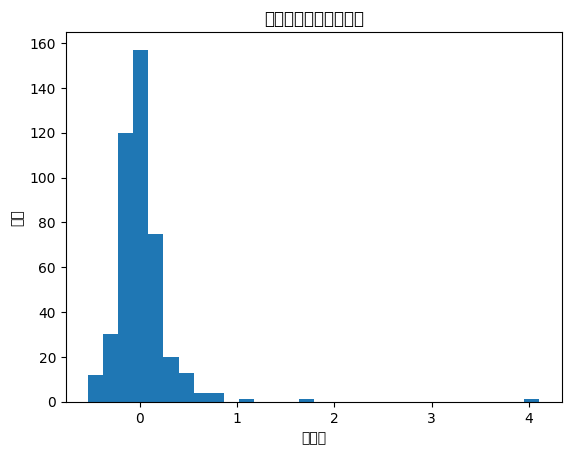

np.float64(0.2977452086965233)

In [ ]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示

# 誤差率を計算


y_pred = model.predict(X_test)

error_rate = (Y_test_pred - Y_test) / Y_test

import matplotlib.pyplot as plt

plt.hist(error_rate, bins=30)
plt.xlabel("誤差率")
plt.ylabel("件数")
plt.title("誤差率のヒストグラム")
plt.show()



In [29]:
print("平均値:", error_rate.mean())
print("標準偏差:", error_rate.std())


平均値: 0.016421585195970183
標準偏差: 0.2977452086965233
